<a href="https://colab.research.google.com/github/rodrfentanes21/Lista7-IA/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Algoritmo de Agrupamento Kmeans**

**Código baseado em:**

1) https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset

2) https://realpython.com/k-means-clustering-python/

In [160]:
!pip install plotly --upgrade
!pip install kneed # To install only knee-detection algorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados
from sklearn.model_selection import train_test_split

In [162]:
import pandas as pd
base= pd.read_csv('/content/sample_data/iris.csv', ',',encoding='cp1252')
base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 5.1 Seleção de atributos

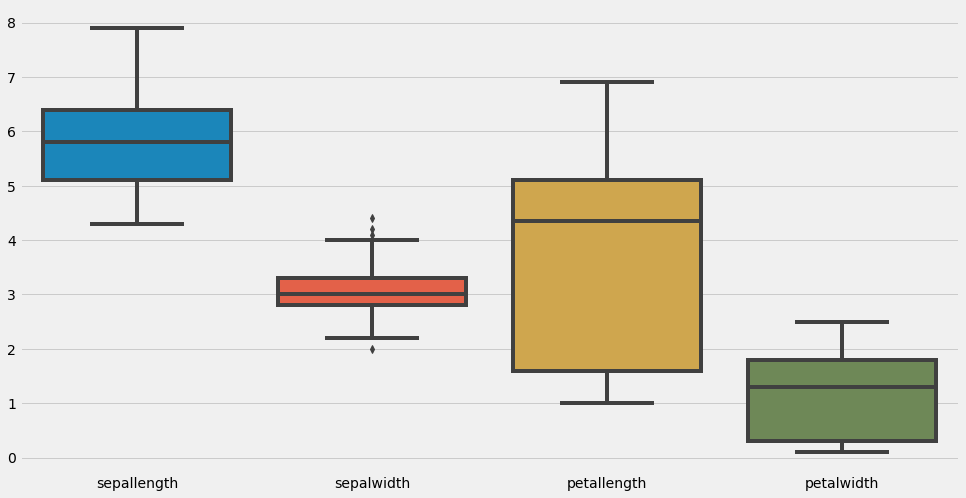

In [163]:
plt.figure(figsize=[15,8])
sns.boxplot(data=base)

## 5.1 Filtrando Outliers

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Plotando o grafico de distribuição para o atributo a ser filtrado

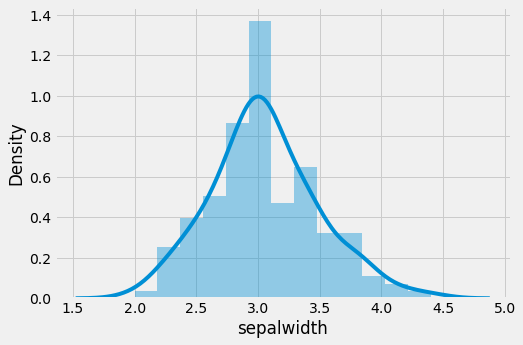

In [165]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(base['sepalwidth'])
plt.show()

In [166]:
print("Maior Aceito",base['sepalwidth'].mean() + 3*base['sepalwidth'].std())
print("Menor Aceito",base['sepalwidth'].mean() - 3*base['sepalwidth'].std())

Maior Aceito 4.354782934086521
Menor Aceito 1.7532170659134791


Encontrando outliers

In [167]:
base[(base['sepalwidth'] > 4.354782934086521) | (base['sepalwidth'] < 1.7532170659134791)]

,sepallength,sepalwidth,petallength,petalwidth,class
15,5.7,4.4,1.5,0.4,Iris-setosa


In [168]:
new_base = base[(base['sepalwidth'] < 4.354782934086521) & (base['sepalwidth'] > 1.7532170659134791)]
new_base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 5.2 Rodando o algoritmo com o atributo classe (não rodar esse código caso fazendo sem o atributo classe)

In [146]:
new_base = pd.get_dummies(new_base, columns=['class'])
new_base

,sepallength,sepalwidth,petallength,petalwidth,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## 5.3 Rodando o algoritmo sem o atributo classe (não rodar esse código caso fazendo com o atributo classe incluso)

In [169]:
base_class = new_base['class']
new_base.drop(["class"], axis=1, inplace=True)
new_base

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Voltando ao k-means

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(new_base, base_class, test_size=0.2, random_state=100)
X_train


,sepallength,sepalwidth,petallength,petalwidth
82,5.8,2.7,3.9,1.2
100,6.3,3.3,6.0,2.5
120,6.9,3.2,5.7,2.3
12,4.8,3.0,1.4,0.1
17,5.1,3.5,1.4,0.3
...,...,...,...,...
88,5.6,3.0,4.1,1.3
104,6.5,3.0,5.8,2.2
68,6.2,2.2,4.5,1.5
25,5.0,3.0,1.6,0.2


In [171]:
X_test

,sepallength,sepalwidth,petallength,petalwidth
129,7.2,3.0,5.8,1.6
11,4.8,3.4,1.6,0.2
119,6.0,2.2,5.0,1.5
16,5.4,3.9,1.3,0.4
124,6.7,3.3,5.7,2.1
135,7.7,3.0,6.1,2.3
33,5.5,4.2,1.4,0.2
1,4.9,3.0,1.4,0.2
117,7.7,3.8,6.7,2.2
46,5.1,3.8,1.6,0.2


In [172]:
Entrada = new_base.iloc[:, 0:4].values
Entrada.shape
Entrada

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3

In [173]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
Entrada = scaler.fit_transform(Entrada)

In [174]:
Entrada

array([[0.22222222, 0.68181818, 0.06779661, 0.04166667],
       [0.16666667, 0.45454545, 0.06779661, 0.04166667],
       [0.11111111, 0.54545455, 0.05084746, 0.04166667],
       [0.08333333, 0.5       , 0.08474576, 0.04166667],
       [0.19444444, 0.72727273, 0.06779661, 0.04166667],
       [0.30555556, 0.86363636, 0.11864407, 0.125     ],
       [0.08333333, 0.63636364, 0.06779661, 0.08333333],
       [0.19444444, 0.63636364, 0.08474576, 0.04166667],
       [0.02777778, 0.40909091, 0.06779661, 0.04166667],
       [0.16666667, 0.5       , 0.08474576, 0.        ],
       [0.30555556, 0.77272727, 0.08474576, 0.04166667],
       [0.13888889, 0.63636364, 0.10169492, 0.04166667],
       [0.13888889, 0.45454545, 0.06779661, 0.        ],
       [0.        , 0.45454545, 0.01694915, 0.        ],
       [0.41666667, 0.90909091, 0.03389831, 0.04166667],
       [0.30555556, 0.86363636, 0.05084746, 0.125     ],
       [0.22222222, 0.68181818, 0.06779661, 0.08333333],
       [0.38888889, 0.81818182,

Para analisar Silhouette:
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [175]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)
limit = int((Entrada.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(Entrada)
    pred = model.predict(Entrada)
    score = silhouette_score(Entrada, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.626
Silhouette Score k = 3: 0.499
Silhouette Score k = 4: 0.440
Silhouette Score k = 5: 0.355
Silhouette Score k = 6: 0.339
Silhouette Score k = 7: 0.335
Silhouette Score k = 8: 0.332


**WCSS - Within Clusters Sum of Squares = é a soma dos quadrados dentro dos clusters**
https://rpubs.com/diascodes/770518

Veja: https://en.wikipedia.org/wiki/Elbow_method_(clustering)

In [176]:
wcss = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(Entrada)
  wcss.append(kmeans.inertia_)

**Usando o método Elbow para encontrar o número ideal de clusters**

In [177]:
wcss

[12.494607231525176,
 7.255942440936545,
 5.728845342660359,
 4.748175323044964,
 4.094654289191286,
 3.684546381204326,
 3.247798458833172,
 2.935528946615732,
 2.6158944963764563]

**Vamos analisar o ponto de inflexão dessa curva?**

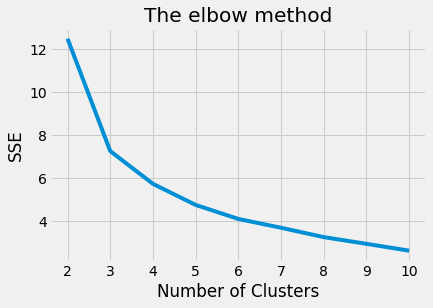

In [178]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [179]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [180]:
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(Entrada)

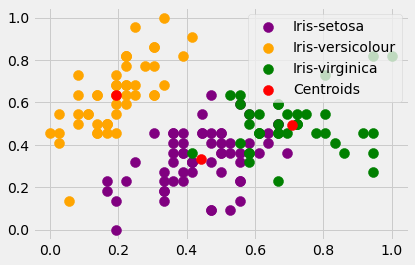

In [181]:
#Visualising the clusters
plt.scatter(Entrada[saida_kmeans == 0, 0], Entrada[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(Entrada[saida_kmeans == 1, 0], Entrada[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(Entrada[saida_kmeans == 2, 0], Entrada[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

## 5.5 X_train e X_test

In [186]:
Entrada_X_train = X_train.iloc[:, 0:4].values
Entrada_X_train.shape
scaler = MinMaxScaler()
Entrada_X_train = scaler.fit_transform(Entrada_X_train)

In [187]:
limit = int((Entrada_X_train.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(Entrada_X_train)
    pred = model.predict(Entrada_X_train)
    score = silhouette_score(Entrada_X_train, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.616
Silhouette Score k = 3: 0.509
Silhouette Score k = 4: 0.441
Silhouette Score k = 5: 0.354
Silhouette Score k = 6: 0.357
Silhouette Score k = 7: 0.336


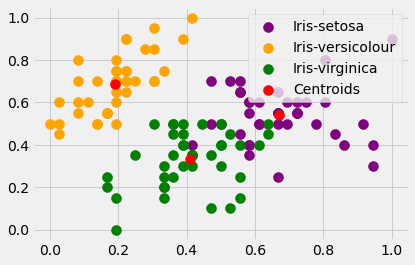

In [191]:
wcss = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(Entrada_X_train)
  wcss.append(kmeans.inertia_)
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(Entrada_X_train)
#Visualising the clusters
plt.scatter(Entrada_X_train[saida_kmeans == 0, 0], Entrada_X_train[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(Entrada_X_train[saida_kmeans == 1, 0], Entrada_X_train[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(Entrada_X_train[saida_kmeans == 2, 0], Entrada_X_train[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

In [193]:
Entrada_X_test = X_test.iloc[:, 0:4].values
Entrada_X_test.shape
scaler = MinMaxScaler()
Entrada_X_test = scaler.fit_transform(Entrada_X_test)

In [194]:
limit = int((Entrada_X_test.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(Entrada_X_test)
    pred = model.predict(Entrada_X_test)
    score = silhouette_score(Entrada_X_test, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.636
Silhouette Score k = 3: 0.487


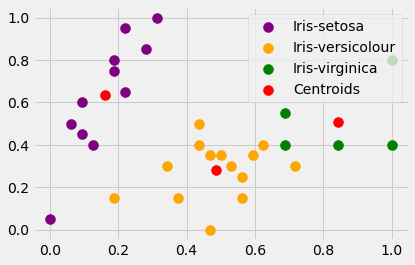

In [195]:
wcss = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(Entrada_X_test)
  wcss.append(kmeans.inertia_)
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(Entrada_X_test)
#Visualising the clusters
plt.scatter(Entrada_X_test[saida_kmeans == 0, 0], Entrada_X_test[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(Entrada_X_test[saida_kmeans == 1, 0], Entrada_X_test[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(Entrada_X_test[saida_kmeans == 2, 0], Entrada_X_test[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()